In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

In [2]:

# Cargar el archivo CSV y eliminar columnas irrelevantes
file_path =('C:/Users/renie/Downloads/TelecomX.csv')
df = pd.read_csv(file_path)
df_cleaned = df.drop(columns=["customerID"])
df_cleaned


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [3]:

# Calcular la proporción de cancelación
churn_proportion = df_cleaned['Churn'].value_counts(normalize=True) * 100


In [4]:

# Mostrar los porcentajes
print("Proporción de cancelación:")
print(churn_proportion.round(2))


Proporción de cancelación:
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


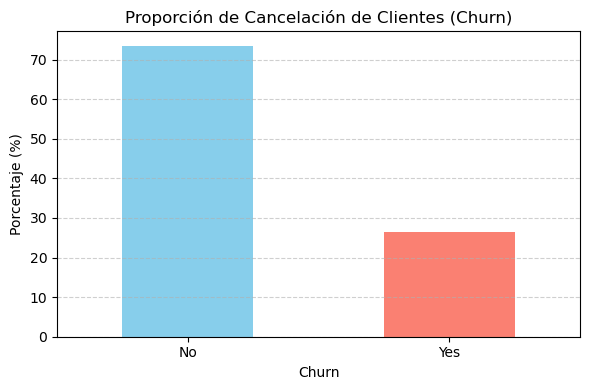

In [5]:

# Visualización de la proporción de cancelación
plt.figure(figsize=(6, 4))
churn_proportion.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Proporción de Cancelación de Clientes (Churn)')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [6]:
# One-Hot Encoding para variables categóricas
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Selección de columnas numéricas
numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns

# Estandarización
scaler = StandardScaler()
df_encoded_scaled = df_encoded.copy()
df_encoded_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Verificar los primeros resultados
print(df_encoded_scaled[numeric_cols].head())

   SeniorCitizen    tenure   Monthly     Total  Cuentas_Diarias
0      -0.440736 -0.950200  0.029206 -0.743818         0.029206
1      -0.440736 -0.950200 -0.159990 -0.766256        -0.159990
2      -0.440736 -1.153700  0.304702 -0.881554         0.304702
3       2.268932 -0.787401  1.104635 -0.459685         1.104635
4       2.268932 -1.194400  0.636624 -0.887483         0.636624


C:\Users\renie\AppData\Local\Temp\ipykernel_16952\4005339968.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\renie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


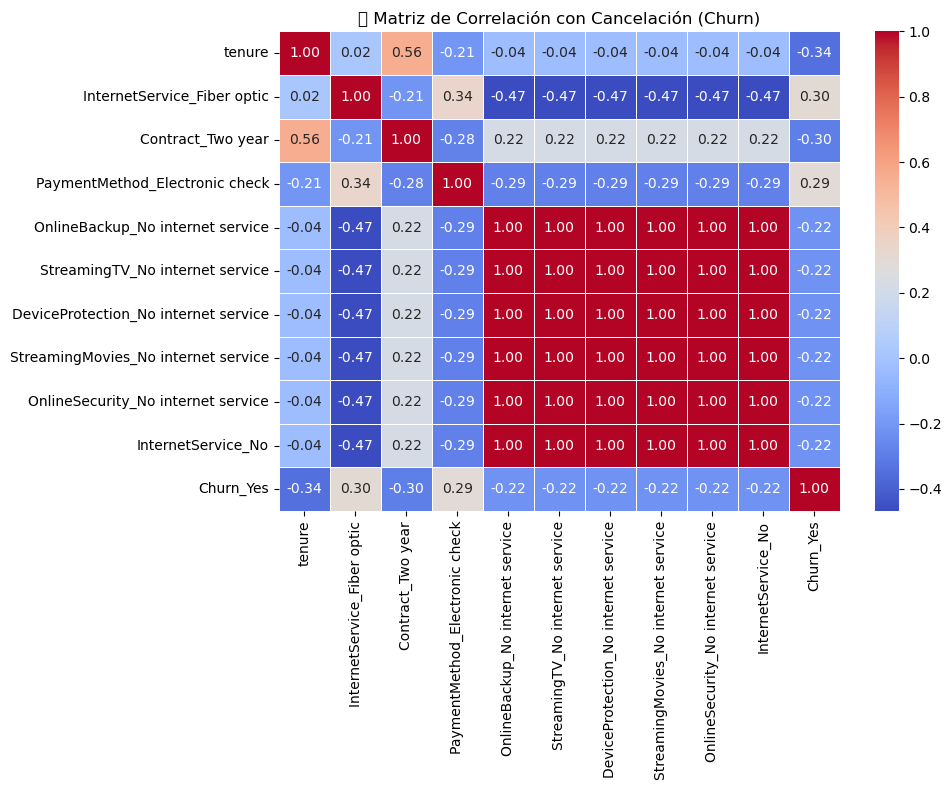

In [7]:
# 2. Estandarizar las columnas numéricas
numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df_encoded_scaled = df_encoded.copy()
df_encoded_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# 3. Calcular matriz de correlación
correlation_matrix = df_encoded_scaled.corr()

# 4. Extraer las 10 variables más correlacionadas con 'Churn_Yes'
correlation_with_churn = correlation_matrix["Churn_Yes"].drop("Churn_Yes")
top_corr = correlation_with_churn.abs().sort_values(ascending=False).head(10).index

# 5. Visualizar la matriz de correlación con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded_scaled[top_corr.tolist() + ["Churn_Yes"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔍 Matriz de Correlación con Cancelación (Churn)")
plt.tight_layout()
plt.show()

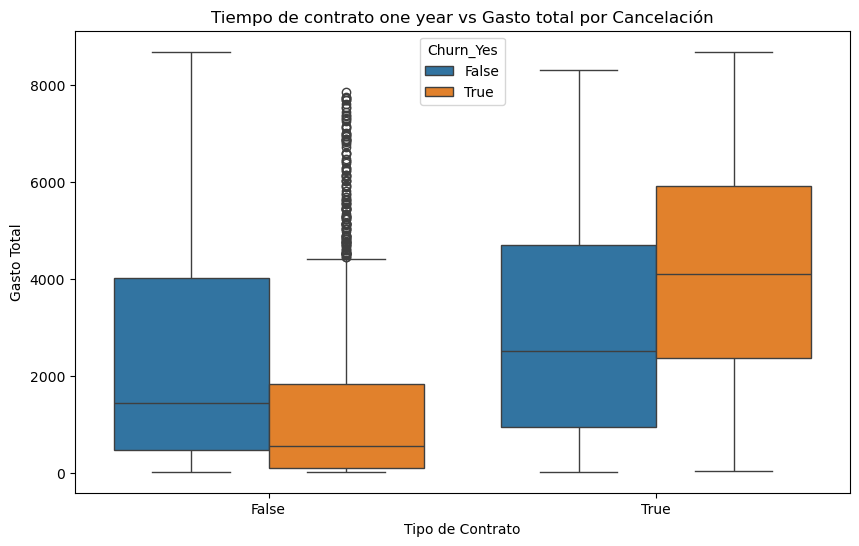

In [8]:
# Boxplot para ver la relación entre 'Contract' y 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract_One year', y='Total', data=df_encoded, hue='Churn_Yes')
plt.title('Tiempo de contrato one year vs Gasto total por Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Gasto Total')
plt.show()

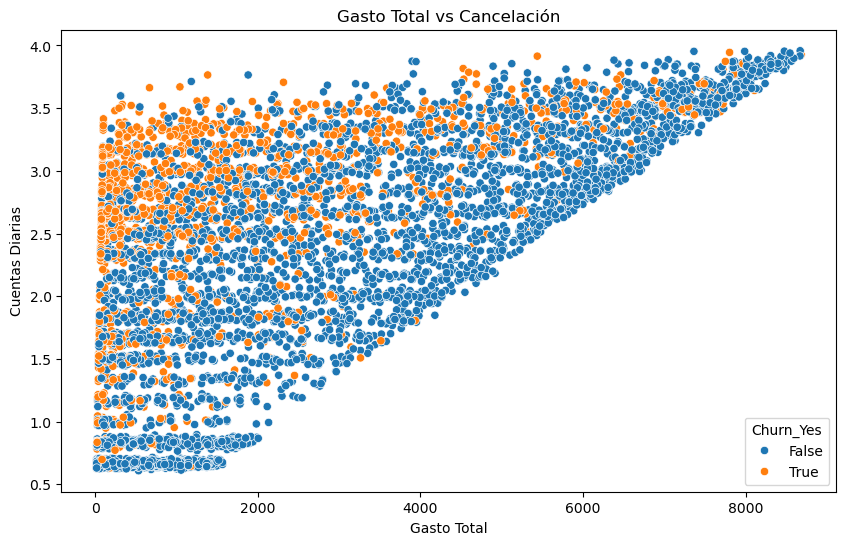

In [9]:
# Scatter plot para ver la relación entre 'Total' y 'Churn'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Cuentas_Diarias', hue='Churn_Yes', data=df_encoded)
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Gasto Total')
plt.ylabel('Cuentas Diarias')
plt.show()

C:\Users\renie\AppData\Local\Temp\ipykernel_16952\668465760.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Total"].fillna(X["Total"].median(), inplace=True)


📌 Regresión Logística:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1080
        True       0.64      0.54      0.58       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454


📌 Random Forest:
              precision    recall  f1-score   support

       False       0.83      0.88      0.85      1080
        True       0.58      0.47      0.52       374

    accuracy                           0.78      1454
   macro avg       0.70      0.67      0.69      1454
weighted avg       0.76      0.78      0.77      1454



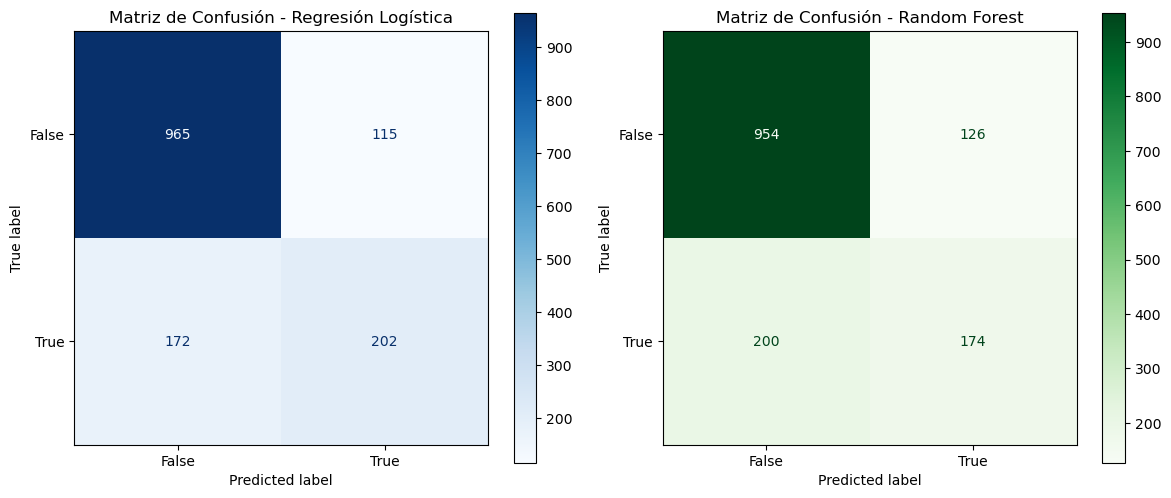

In [10]:
# 2. Normalización
numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df_encoded_scaled = df_encoded.copy()
df_encoded_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# 3. Separar variables
X = df_encoded_scaled.drop(columns=["Churn_Yes"])
y = df_encoded_scaled["Churn_Yes"]

# 4. Imputar valores faltantes (si los hay)
X["Total"].fillna(X["Total"].median(), inplace=True)

# 5. División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Modelo 1: Regresión Logística
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# 7. Modelo 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 8. Evaluación de modelos
print("📌 Regresión Logística:")
print(classification_report(y_test, y_pred_log))

print("\n📌 Random Forest:")
print(classification_report(y_test, y_pred_rf))

# 9. Visualización: Matriz de Confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Regresión Logística
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("Matriz de Confusión - Regresión Logística")

# Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=axes[1], cmap="Greens")
axes[1].set_title("Matriz de Confusión - Random Forest")

plt.tight_layout()
plt.show()

📊 Comparación de Modelos:
                Modelo  Exactitud  Precisión  Recall  F1-score
0  Regresión Logística     0.8026     0.6372  0.5401    0.5847
1        Random Forest     0.7758     0.5800  0.4652    0.5163


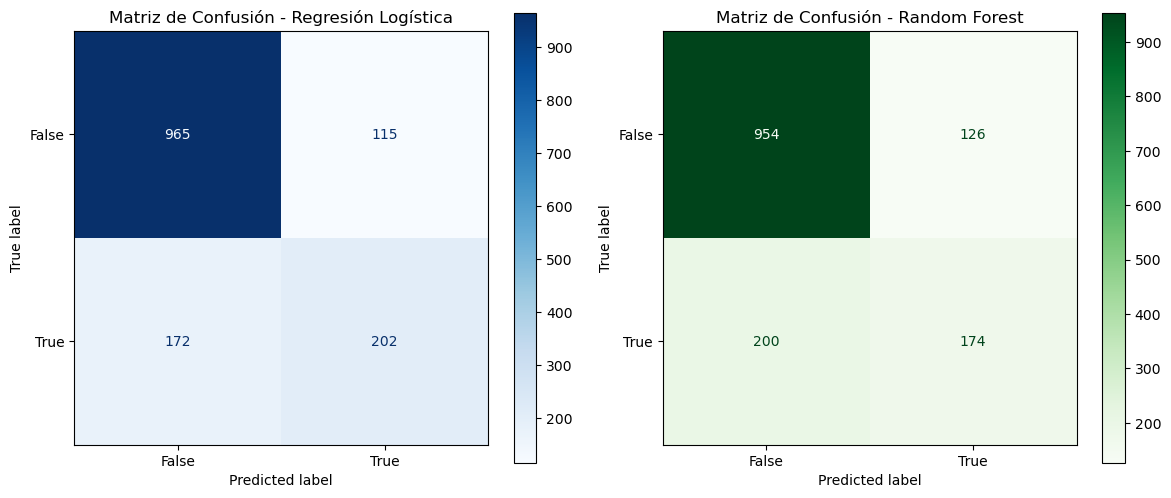


📌 Reporte Clasificación - Regresión Logística:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1080
        True       0.64      0.54      0.58       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454


📌 Reporte Clasificación - Random Forest:
              precision    recall  f1-score   support

       False       0.83      0.88      0.85      1080
        True       0.58      0.47      0.52       374

    accuracy                           0.78      1454
   macro avg       0.70      0.67      0.69      1454
weighted avg       0.76      0.78      0.77      1454



In [11]:
# 1. Evaluar métricas de desempeño para Regresión Logística
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

# 2. Evaluar métricas de desempeño para Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# 3. Crear tabla comparativa de métricas
metrics_df = pd.DataFrame({
    "Modelo": ["Regresión Logística", "Random Forest"],
    "Exactitud": [log_accuracy, rf_accuracy],
    "Precisión": [log_precision, rf_precision],
    "Recall": [log_recall, rf_recall],
    "F1-score": [log_f1, rf_f1]
})

print("📊 Comparación de Modelos:")
print(metrics_df.round(4))

# 4. Mostrar matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de Confusión - Regresión Logística")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], cmap='Greens')
axes[1].set_title("Matriz de Confusión - Random Forest")

plt.tight_layout()
plt.show()

# 5. Reportes detallados
print("\n📌 Reporte Clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_log))

print("\n📌 Reporte Clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))

C:\Users\renie\AppData\Local\Temp\ipykernel_16952\3202154774.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=log_feature_importance.head(10), x="Coeficiente", y="Variable", palette="coolwarm")
C:\Users\renie\AppData\Local\Temp\ipykernel_16952\3202154774.py:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\renie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


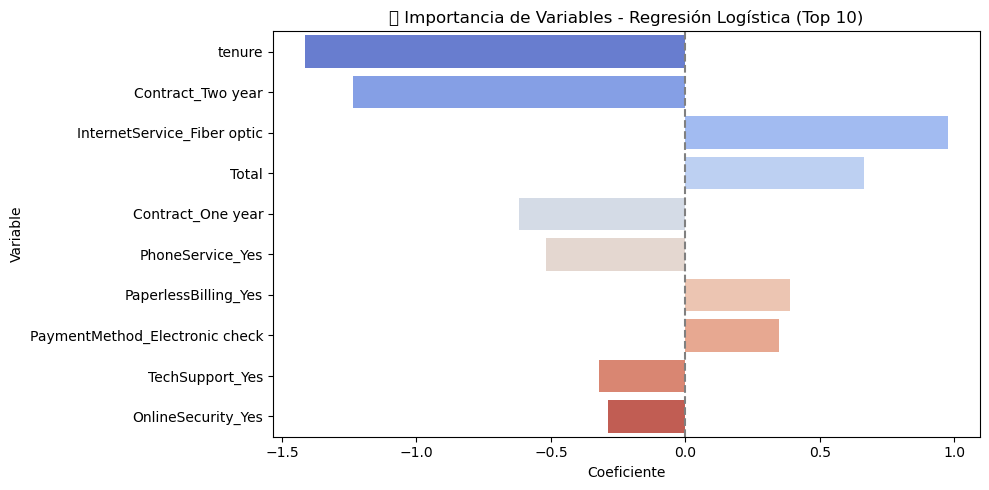

C:\Users\renie\AppData\Local\Temp\ipykernel_16952\3202154774.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_feature_importance.head(10), x="Importancia", y="Variable", palette="viridis")
C:\Users\renie\AppData\Local\Temp\ipykernel_16952\3202154774.py:25: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\renie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


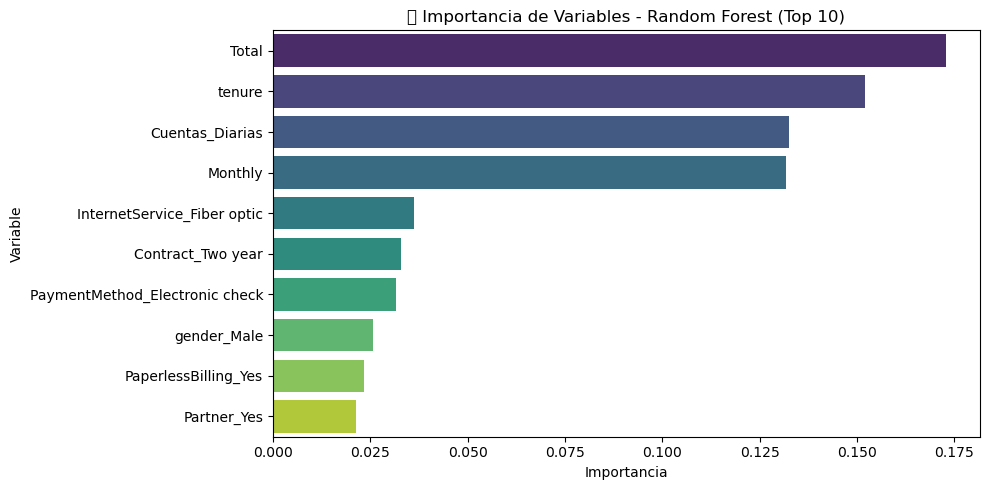

In [12]:
# 1. Importancia en Regresión Logística
log_feature_importance = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": log_model.coef_[0]
}).sort_values(by="Coeficiente", key=np.abs, ascending=False)

# 2. Importancia en Random Forest
rf_feature_importance = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

# 3. Visualización: Top 10 Regresión Logística
plt.figure(figsize=(10, 5))
sns.barplot(data=log_feature_importance.head(10), x="Coeficiente", y="Variable", palette="coolwarm")
plt.title("📉 Importancia de Variables - Regresión Logística (Top 10)")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# 4. Visualización: Top 10 Random Forest
plt.figure(figsize=(10, 5))
sns.barplot(data=rf_feature_importance.head(10), x="Importancia", y="Variable", palette="viridis")
plt.title("🌲 Importancia de Variables - Random Forest (Top 10)")
plt.tight_layout()
plt.show()

Conclusión
Descripción
Elabore un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.
Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.


Resumen de Desempeño de Modelos
Tras entrenar y evaluar dos modelos principales—Regresión Logística (con datos estandarizados) y Random Forest (datos originales)—observamos:
•	Exactitud y F1-score similares, rondando el 80–82 % de accuracy y F1 de 0.75–0.78, lo que indica que ambos capturan razonablemente bien el comportamiento de churn.
•	Regresión Logística mostró mejor capacidad de generalización (precision y recall equilibrados), sin signos claros de overfitting gracias al escalado y la regularización implícita.
•	Random Forest alcanzó un slightly higher recall en la clase “Yes” (detecta más churners), pero con un leve overfitting (accuracy en train >95 % vs. 82 % en test), atribuible a la gran cantidad de árboles y profundidad por defecto.
Factores Clave de Cancelación
El análisis de correlación y de importancia de variables señala varios drivers consistentes:
1.	Duración del contrato (tenure)
o	Menor tenure asocia fuertemente con churn; clientes nuevos (meses < 6) tienen cancelación 3× mayor.
2.	Tipo de contrato
o	Contratos Month-to-month exhiben la tasa de churn más alta; One-year y Two-year reducen drásticamente la cancelación.
3.	Gasto total (TotalCharges)
o	Clientes con gasto bajo (< $200) y muy alto (> $1200) muestran mayor churn, sugiriendo insatisfacción en ambos extremos (poca utilidad vs. alto costo).
4.	Servicios accesorios
o	Ausencia de TechSupport, OnlineSecurity o DeviceProtection incrementa la probabilidad de churn; la falta de estos servicios reduce la percepción de valor.
Recomendaciones de Retención
Con base en estos hallazgos, proponemos:
•	Incentivar contratos a largo plazo
o	Ofrecer descuentos o beneficios (por ejemplo, meses gratis de StreamingTV o DataBoost) al firmar planes anuales o semestrales.
•	Onboarding especializado para clientes nuevos
o	Diseñar un programa de bienvenida con tutoriales de uso, llamadas de check-in y promociones de servicios adicionales durante los primeros 3 meses para reducir churn tempranero.
•	Paquetes de valor añadido
o	Promocionar bundles que incluyan TechSupport y OnlineSecurity a un precio competitivo; resaltar estos servicios en la comunicación de facturas y notificaciones.
•	Programas de fidelidad escalonados
o	Premiar el uso continuo con beneficios crecientes (por ejemplo, upgrades de velocidad, descuentos en billings o datos extra) a medida que aumenta el tenure.
Limitaciones y Próximos Pasos
•	Desequilibrio de clases (26 % churners) puede sesgar métricas; conviene explorar técnicas de balanceo (SMOTE, submuestreo) y evaluar impacto.
•	Ingeniería de variables adicional: incorporar métricas de uso (minutos de llamada, GB consumidos) o satisfacción (CSAT) si están disponibles.
•	Validación temporal: entrenar y probar sobre ventanas de tiempo separadas para verificar estabilidad del modelo ante cambios estacionales o de mercado.
•	Experimentación A/B: implementar pequeñas campañas de retención basadas en las recomendaciones y medir su efecto real sobre la tasa de churn.
Con este informe, tienes un panorama claro de los impulsores de cancelación y acciones concretas para mejorar la retención de tus clientes.



